# Classification Task, Evaluation Measures, and K-Nearest Neighbor
Classification models are another broad class of predictive models. Following the Machine Learning terminology, it is common to talk about classification or regression "tasks". These are the two main classes of tasks belonging to the broader class of supervised learning.

## Task Definition
Recall that a predictive model is a function defined as follows:

$$h : \mathcal{X} \to \mathcal{Y}$$

If in the case of regression $\mathcal{X}=\Re^n$ and $\mathcal{Y}=\Re^m$, in the case of classification, the output targets are discrete values **which are generally referred to as "classes"**. Without loss of generality, if there are $M$ classes, then we define $\mathcal{Y}=\{1,\ldots,M\}$. If the inputs are numerical vectors (it does not have to always be this way, but we can usually employ a representation function to map the input to a numerical vector), a classification model can be defined as:

$$h : \Re^n \to \{0,\ldots,M-1\}$$

Also in this case, we will assume to have a set of data to train and evaluate our model

$$\text{D}=\{(x_i,y_i)\}_{i=1}^N$$

Note that in this case $x_i\in \Re^n$ and $y_i \in \{0,\ldots,M-1\}$. Here, the values $y_i$ are generally called "**labels**", while the values $\hat y = h(x)$ predicted using the classifier $h$ are called **predicted labels**.

We can find the optimal model $h$ by minimizing the empirical risk. A possible loss function is the following one:

$$L(\hat y, y) = \begin{cases}1 &\text{ if }& \hat y \neq y \\ 0 &\text{ if }& \hat y=y \end{cases}$$

Hence, the empirical risk will be the fraction of incorrect predictions:

$$R_{emp}(h) = \frac{1}{N} \sum_{i=1}^N L(\hat y_i, y_i) = \frac{\text{number of incorrect predictions}}{N}$$

The empirical risk computed as defined above is also known as **error rate**. It is a number comprised between $0$ and $1$ which can also be interpreted as a percentage.

The classifier can be learned by minimizing the empirical risk:

$$\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h)$$

### Examples

Classifiers support decision making any time that observations need to be categorized in one of a predefined set of classes. Examples of such problems are:

-   Detecting spam emails (**spam vs legitimate email classification**).

-   Classifying social media posts as being about politics or something else
    (**politics vs non-politics classification**).

-   Recognizing the object depicted in an image out of 1000 different
    objects (**object recognition**).

For example, we can define spam detection as follows:

-   *Task*: given an e-mail, classify it as spam or non-spam.

-   *Input example* $\mathbf{e}$: the text of the e-mail. This can be a
    sequence of characters of arbitrary length. We can use some **representation function** to map an email $\mathbf{e}$ to a vector of real numbers $\mathbf{x} \in \Re^n$. We also assume that a training set pairing the vectors $\mathbf{x}$ with labels $y \in \{ 0,1\}$ is available.

-   *Classifier*: a function $h:\Re^n \rightarrow \{ 0,1\}$.

-   *Output*: a predicted label  $\widehat{y} \in \{ 0,1\}$ indicating
    if the e-mail is legitimate or spam. Here we have a **binary
    classification task**, hence $M = 2$.



## Evaluation Measures

As with the case of regression, we need to define evaluation measures. These will be useful to  **guide
training** (e.g., modify the parameters in order to improve the performance of the algorithm on the training set), **tune hyper-parameters** and to **finally assess that the algorithm works on unseen data** (the test set).

As in the case of regression, we will consider the set of **ground truth test labels**:

$$Y_{TE} = \left\{ y^{(i)}|\left( \mathbf{x}^{(i)},y^{(i)} \right) \in TE \right\}_{i}$$

and the set of **predicted test labels** :

$${\widehat{Y}}_{TE} = \left\{ h\left( \mathbf{x}^{(i)} \right)|\left( \mathbf{x}^{(i)},y^{(i)} \right) \in TE \right\}_{i}$$

which will be used as inputs of our performance measures.

### Accuracy

Accuracy is a very common performance measure. We define accuracy as
**the percentage of test examples for which our algorithm has predicted
the correct label**:

$$Accuracy\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \frac{\left| \left\{ y^{(i)} : y^{(i)} = {\widehat{y}}^{(i)} \right\} \right|}{|Y_{TE}|}$$

For instance, if the test set contains $100$ examples and for $70$ of
them we have predicted the correct label, then we will have:

$$Accuracy\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \frac{70}{100} = 0.7$$

Note that accuracy is always a number comprised between 0 and 1. We can
see the accuracy as a percentage. For instance, in the example above we
could say that we have an accuracy of $70\%$.

### Error Rate
The error rate is closely associated to accuracy and defined as:

$$ErrorRate\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \frac{\left| \left\{ y^{(i)} : y^{(i)} \neq {\widehat{y}}^{(i)} \right\} \right|}{|Y_{TE}|} =  1- Accuracy\left( Y_{TE},{\widehat{Y}}_{TE} \right)$$

#### Example - Imbalanced Dataset

To see the limits of accuracy, let us consider a dataset containing
$10000$ elements of two classes distributed as follows:

-   $500$ data points from class $0$;

-   $9500$ data points from class $1$.

Let us now consider a naïve classifier which always predicts class 1:

$$f\left( \mathbf{x} \right) = 1$$

Intuitively, we see that this classifier is not a good one, as it
discards its input and just predicts the most frequent class. However,
it can be easily seen that its accuracy is $0.95$.



### Error Types 

The main limitation of the accuracy is that it counts the number of
mistakes made by the algorithm, but it does not consider which types of
mistakes it makes. In general, on each example, we can make two kinds of mistakes:

-   **Type 1**: we classify an example as belonging to the considered
    class, but it does not. These kinds of misclassifications are often
    called **False Positives (FP)**.

-   **Type 2**: we classify the example as not belonging to the
    considered class, but it does belong to it. These kinds of
    misclassifications are often called **False Negatives (FN)**.

We can also have two kinds of correct predictions:

-   **True Positives (TP)**: these are elements from the considered
    class which have been classified as actually belonging to that
    class.

-   **True Negatives (TN)**: these are elements which are not from the
    considered class and have been classified as actually not belonging
    to that class.

### Confusion Matrix

To have a more complete view of how our classifier is performing, we can
put these numbers in a table which we will call a **confusion matrix**:

![](../_static/lecture_specific/classification/confusion.png)

In the matrix, the rows indicate the true labels, whereas the columns
indicate the predicted labels. A good confusion matrix has large numbers
in the main diagonal (TP and TN) and low numbers in the rest of the
matrix (where the errors are).

The accuracy can be recovered from the confusion matrix as follows:

$$Accuracy = \frac{TP + TN}{TP + FN + FP + TN}$$

which consists in **summing the numbers on the diagonal and dividing by
the sum of all numbers**. We can see the computation of the accuracy
from the confusion matrix graphically as follows:

![](../_static/lecture_specific/classification/confusion2.png)


#### Example 1 -- Spam Detector

Let us consider a spam detector which correctly detects $40$ out of $50$
spam emails, while it only recognizes $30$ out of $50$ legitimate
emails. The confusion matrix associated to this classifier will be as
follows:

![](../_static/lecture_specific/classification/spam.png)

Its accuracy will be:

$$Accuracy = \frac{40 + 30}{40 + 10 + 20 + 30} = \frac{70}{100} = 0.7$$

#### Example 2 -- Imbalanced Dataset

Let us now consider the example of our imbalanced dataset with $9500$
data points of class 1 and $500$ data points of class 0. The confusion
matrix of the naïve classifier $f\left( \mathbf{x} \right) = 1$ will be:

![](../_static/lecture_specific/classification/imbalanced.png)

If we compute the accuracy of this classifier, we will obtain a good
performance:

$$Accuracy = \frac{9500}{9500 + 500} = 0.95$$

However, looking at the confusion matrix, **it is clear that something
is wrong, and our classifier is not working well**.



### Precision and Recall

The confusion matrix allows to understand if there is an issue with the
classifier in the case of imbalanced data. However, it is still
convenient to have scalar measures which can tell us something about how
the classifier is doing. In practice, it is common to define two
complementary measures: precision and recall.

**Precision** measures **how many of the examples which have been
classified as positives were actually positives** and is defined as
follows:

$$Precision = \frac{TP}{TP + FP}$$

**Recall** measures **how many of the examples which are positives, have
been correctly classified as positives** and is defined as follows:

$$Recall = \frac{TP}{TP + FN}$$

We can see graphically the computation of precision and recall as
follows:

![](../_static/lecture_specific/classification/precision_recall.png)

#### High Precision vs High Recall

These values capture different properties of the classifier. Depending
on the application, we may want to have a higher precision or a higher
recall. For example:

-   Consider a **spam detector**: we may want to have a very **high
    precision**, even at the cost of a **low recall**. Indeed, we want
    to make sure that if we classify an e-mail as spam (and hence we
    filter it out), it is actually spam (hence a high precision). This
    is acceptable even if sometimes we let a spam email get through the
    filter (hence a low recall).

-   Consider a **medical pre-screening** test which is used to assess if
    a patient is likely to have a given pathology. The test is cheap
    (e.g., a blood test) and can be made on a large sample of patients.
    If the test is positive, we then perform a more expensive but
    accurate test. In this case, we want to have a **high recall**.
    Indeed, if a patient has the pathology, we want to detect it and
    send the patient for the second, more accurate test (hence a high
    precision). This is acceptable even if sometimes we have false
    positives (hence a low precision). Indeed, if we wrongly detect a
    pathology, the second test will give the correct result.

Precision and recall can often have contrasting values (e.g., we can
obtain a high precision but a low recall and vice versa), hence it is
generally **necessary to look at both numbers together**.



#### Example -- Spam Detector

Let us consider again the spam example, with the classifier obtaining
this confusion matrix:

![](/_static/lecture_specific/classification/spam.png)

From the confusion matrix, we see that:

-   TP=40.

-   FN=10.

-   FP=20.

-   TN=30.

We can compute the following precision and recall values:

-   $Precision = \frac{40}{20 + 30} = 0.8$;

-   $Recall = \frac{40}{40 + 20} = 0.67$.

Like the accuracy, precision and recall are telling us that the
classifier is not perfect. Interestingly, these measures are telling us
that **while most of the detected e-mails are actually spam, not all
spam e-mails are correctly detected.** Considering this application, we
may want to have a very high precision, (i.e., if we detected an e-mail
as spam, we want to make sure that it is actually spam) **even at the
cost of a lower recall.**



### $F_{1}$ Score

We have seen that precision and recall describe different aspects of the
classifier and hence it is often a good idea to look at them jointly.
However, it is often convenient to have a single number which classifies
both numbers.

The $F_{1}$ score allows to do exactly this, by computing the **harmonic
mean** of precision and recall:

$$F_{1} = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

We can note that, in order to obtain a large $F_{1}$ score, we need to
obtain **both a large precision and a large recall.** This is a property
of the harmonic mean, as it is illustrated in the following example
which compares the arithmetic mean (precision/2+recall/2) to the
harmonic mean (the $F_{1}$ score):

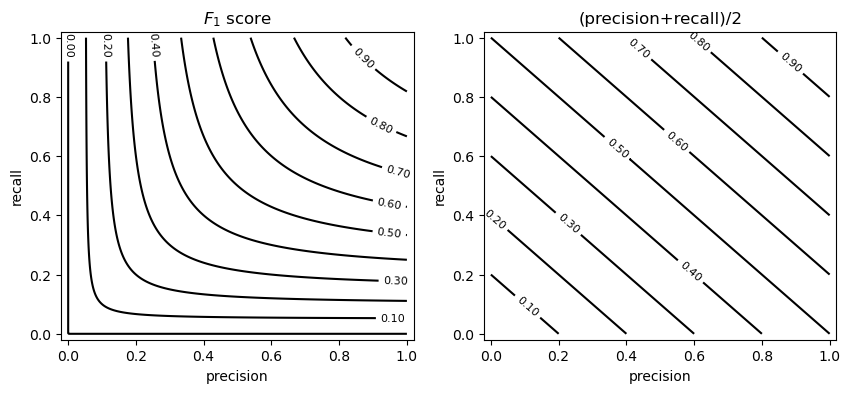

In [8]:
import numpy as np
precision,recall=np.meshgrid(np.linspace(0,1,500), np.linspace(0,1,500))
f1 = (2*precision*recall)/(precision+recall+0.00000001)
mean = (precision+recall)/2

from matplotlib import pyplot as plt
plt.figure(figsize=(10,4), dpi=100)
plt.subplot(1,2,1)
contours = plt.contour(precision, recall, f1, colors='black', levels=11);
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.2f')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title("$F_1$ score")
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])

plt.subplot(1,2,2)
contours = plt.contour(precision, recall, mean, colors='black', levels=11);
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.2f')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title("(precision+recall)/2")
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.show()

The example above shows the isocurves obtained by considering given
precision and recall values. As can be noted, to obtain a large $F_{1}$
score, we need to have both a large precision and a large recall.

#### Example - Spam Detector

Let us consider again the spam example, with the classifier obtaining
this confusion function:

![](../_static/lecture_specific/classification/spam.png)

Starting from the precision and recall values previously computed:


-   $Precision = \frac{40}{20 + 30} = 0.8$;

-   $Recall = \frac{40}{40 + 20} = 0.67$.

we can compute the $F_{1}$ score as:

$$F_{1} = 2\frac{precision \cdot recall}{recall + recall} = \frac{1.072}{1.47} = 0.72$$

Note that, since the dataset is balanced, this value is not very
different from the accuracy of $0.7$.



### Confusion Matrix for Multi-Class Classification

We have seen the confusion matrix in the case of binary classification.
However, it should be noted that the confusion matrix generalizes to the
case in which there are $M$ classes. In that case, the confusion matrix
is $M \times M$ and its general element $C_{ij}$ indicates the number of
elements **belonging to class i, which have been classified as belonging
to class j**. An example of a confusion matrix in the case of three
classes is the following:

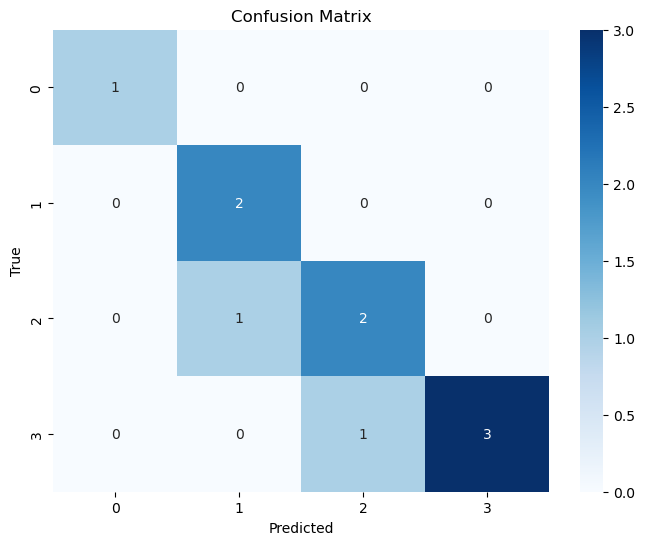

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example data (replace this with your actual data)
true_labels = [0, 1, 1, 2, 2, 2, 3, 3, 3, 3]
predicted_labels = [0, 1, 1, 2, 1, 2, 3, 3, 3, 2]

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Similar to the binary case, we expect to have large numbers on the
diagonal and small number in all other cells. The concepts of precision,
recall and $F_{1}$ score generalize considering a binary classification
task for each of the classes (i.e., distinguishing each class from all
the others). Hence, in the example shown above, we would have three
$F_{1}$ scores:

In [10]:

from sklearn.metrics import f1_score
# Compute F1 scores
f1_scores = f1_score(true_labels, predicted_labels, average=None)

print(f1_scores)


[1.         0.8        0.66666667 0.85714286]


### ROC (Receiver Operating Characteristic) Curve and Area Under the Curve (AUC) Measures
As previously mentioned, some binary classifiers output a probability or a confidence score and allow to obtain class predictions by thresholding on such probabilities or scores. When the confidence value is not a probability, it might not be easy to interpret it and find a good threshold. Even when the classifier outputs a probability, the optimal threshold might not be $0.5$. For instance, we may want to build an intrusion detection system which is more or less sensitive to potential intrusions.

The ROC curve allows to evaluate the performance of a classifier independently from the threshold. Specifically, let 

$$c(\mathbf{x})$$

be a function predicting a confidence value from an input vector $\mathbf{x}$. For instance, in the case of the logistic regressor:

$$c(\mathbf{x}) = \sigma(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)$$

We will define our classification function as:

$$h_\theta(\mathbf{x}) = [\sigma(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n) \geq \theta]$$

where $[\cdot]$ denotes the Iverson brackets and $\theta \in \Re$ is a real-valued threshold.

Depending on the chosen value of the threshold, we will have a given number of true positives, true negatives, false positives and false negatives:

$$TP_\theta$$
$$TN_\theta$$
$$FP_\theta$$
$$FN_\theta$$

We will define the true positive rate (TPR) and false positive rate (FPR) as follows:

$$TPR_\theta = \frac{TP_\theta}{TP_\theta+FN_\theta}$$

$$FPR_\theta = \frac{FP_\theta}{FP_\theta+TN_\theta}$$

In practice:

* The TPR is the fraction of true positives over all positive elements - **this is the same as the recall**;
* The FPR on the contrary is the fraction of false positive predictions over all negative elements.

We note that:
* If we pick **low threshold values, both the TPR and the FPR will be equal to 1**. Indeed, with a small enough threshold, all elements will be classified as positives and there will be no predicted negatives, so the TPR will be equal to 1. At the same time, the FPR will be 1 because we will have no true negatives;
* If we pick **high threshold values, both the TPR and the TNR will be zero**. Indeed, with a large enough threshold, all elements will be classified as negatives and there will be no positive predictions, so the TPR will be zero. At the same time, since all elements will be classified as negatives and there will be no false positive predictions, the FPR will be equal to $0$;

An ROC curve is obtained by picking a threshold value $\theta$ and plotting a 2D point $(TPR_\theta, TNR_\theta)$. By varying the threshold $\theta$, we obtain a curve which tell us what is the trade-off between TPR and TNR regardless of the threshold.

The following plot show an example of an ROC curve for a binary classifier on the breast cancer dataset:

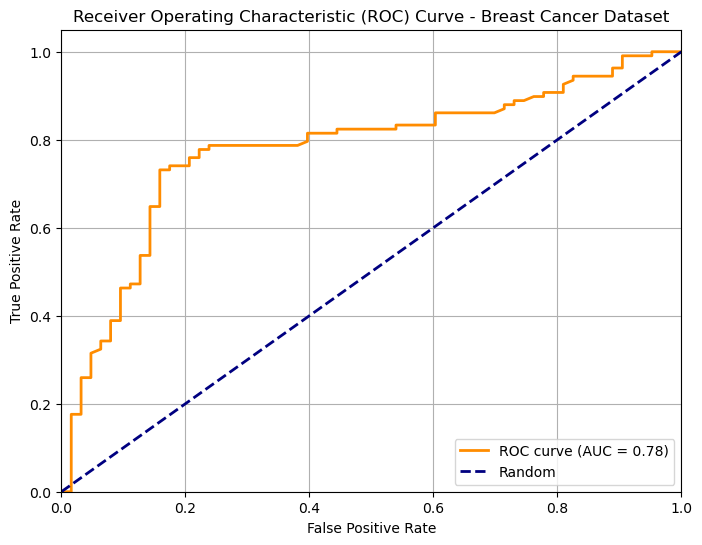

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:,[1]]
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Breast Cancer Dataset')
plt.legend(loc='lower right')
plt.grid()
plt.show()


We know that the two points $(0,0)$ and $(1,1)$ belong to the curve. Ideally, starting from a low threshold (with TPR=FPR=1), as we move the threshold up enough, **we would expect the FPR to decrease (we are discarding false positives), while the TPR is still high (we are not discarding true positives)**. Hence the ideal curve should be a rectangular curve touching point $(0,1)$. In practice, we can measure the area under the ROC curve to see how well the classifier is doing. This value is generally referred to as "AUC".


The dashed line indicates the performance of a random predictor. Note the the area under the curve identified by this dashed line will be equal to $0.5$. Any curve which is systematically below this line indicates a classifier which is doing thresholding in the wrong way (i.e. we should invert the sign of the thresholding). For instance, this is the curve of the same classifier when we invert the sign of thresholding:

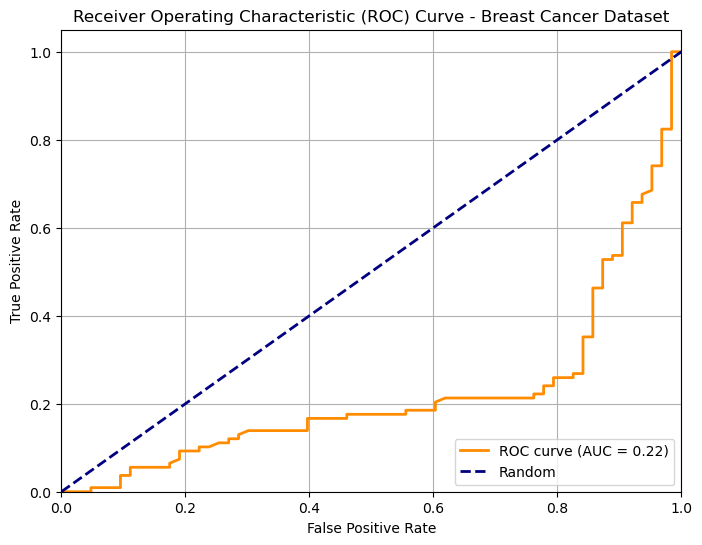

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:,[1]]
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = -model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Breast Cancer Dataset')
plt.legend(loc='lower right')
plt.grid()
plt.show()


We can use ROC curves to compare two different classifiers as shown in the following:

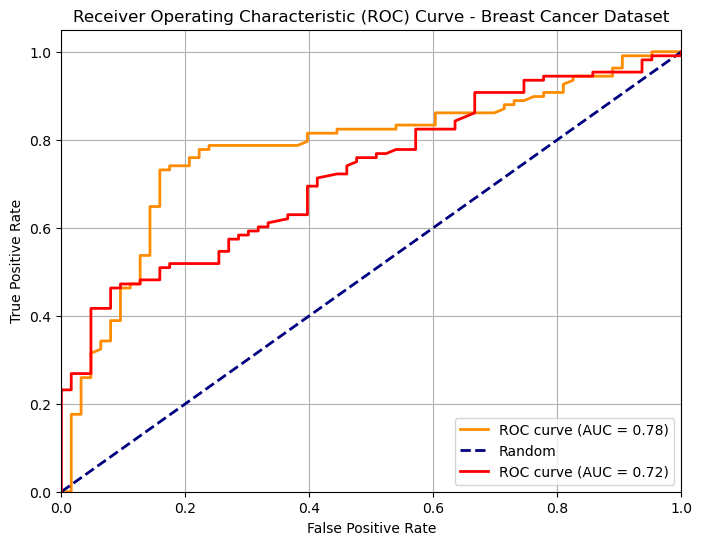

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = LogisticRegression()
model.fit(X_train[:,[1]], y_train)
# Predict probabilities on the test set
y_scores = model.predict_proba(X_test[:,[1]])[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Breast Cancer Dataset')
plt.legend(loc='lower right')


model = LogisticRegression()
model.fit(X_train[:,[4]], y_train)
# Predict probabilities on the test set
y_scores = model.predict_proba(X_test[:,[4]])[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()
plt.show()


## A Simple Classifier: The Threshold Model

Let's start with the simplest possible classifier. We'll use a dataset of heights and weights to predict a person's `sex` (Male or Female).

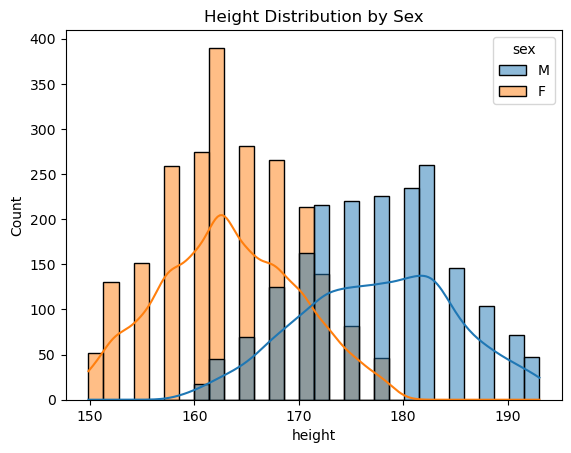

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load the dataset
data = pd.read_csv('http://antoninofurnari.it/downloads/height_weight.csv')

# Let's look at the height distributions
sns.histplot(data=data, x='height', hue='sex', kde=True, bins=30)
plt.title('Height Distribution by Sex')
plt.show()

The plot clearly shows that, on average, males are taller than females. This suggests we could build a simple classifier:

**"If a person's `height` is above a certain *threshold*, we predict 'Male'."**

Let's arbitrarily pick a threshold of **170 cm**.

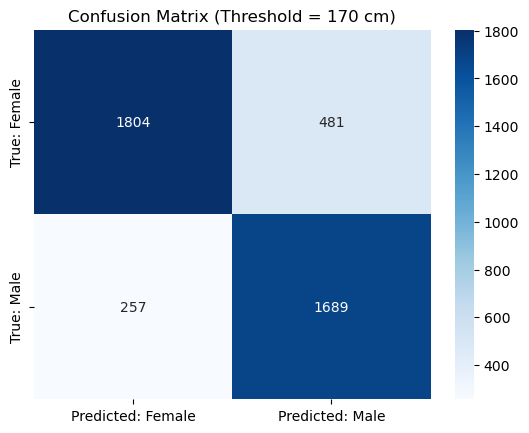

              precision    recall  f1-score   support

       False       0.88      0.79      0.83      2285
        True       0.78      0.87      0.82      1946

    accuracy                           0.83      4231
   macro avg       0.83      0.83      0.83      4231
weighted avg       0.83      0.83      0.83      4231



In [43]:
# Our "model" is just a simple threshold
threshold = 170

# 1. Get the predicted labels (True for 'Male', False for 'Female')
# This is our model's prediction, ŷ
male_pred = (data['height'] >= threshold)

# 2. Get the "Ground Truth" labels
# This is the true y
male_gt = (data['sex'] == 'M')

# Now, let's see how well our simple "model" did.
# We will build a Confusion Matrix.
cm = confusion_matrix(male_gt, male_pred)

# Let's visualize it
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Female', 'Predicted: Male'],
            yticklabels=['True: Female', 'True: Male'])
plt.title(f'Confusion Matrix (Threshold = {threshold} cm)')
plt.show()
print(classification_report(male_gt, male_pred))

Our model has only a single threshold parameter. As we can see, changing it affects performance. For instance, setting the threshold ot $180cm$ gives this confusion matrix:

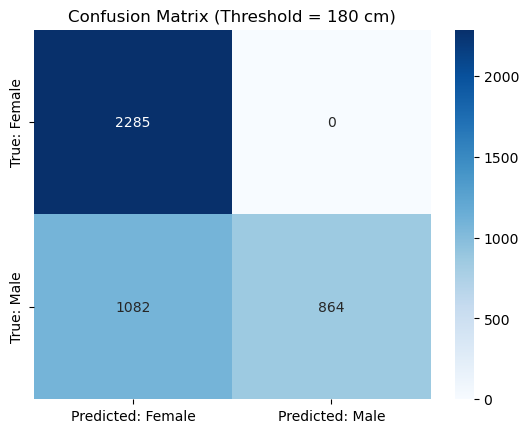

              precision    recall  f1-score   support

       False       0.68      1.00      0.81      2285
        True       1.00      0.44      0.61      1946

    accuracy                           0.74      4231
   macro avg       0.84      0.72      0.71      4231
weighted avg       0.83      0.74      0.72      4231



In [44]:
# Our "model" is just a simple threshold
threshold = 180

# 1. Get the predicted labels (True for 'Male', False for 'Female')
# This is our model's prediction, ŷ
male_pred = (data['height'] >= threshold)

# 2. Get the "Ground Truth" labels
# This is the true y
male_gt = (data['sex'] == 'M')

# Now, let's see how well our simple "model" did.
# We will build a Confusion Matrix.
cm = confusion_matrix(male_gt, male_pred)

# Let's visualize it
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Female', 'Predicted: Male'],
            yticklabels=['True: Female', 'True: Male'])
plt.title(f'Confusion Matrix (Threshold = {threshold} cm)')
plt.show()
print(classification_report(male_gt, male_pred))

The model is "worse" (more elements off diagonal), but it also found many more females. In practice, moving the threshold changes the balance between true positives and false positives. In practice, we can compute the ROC curve to visualize this trade-off:

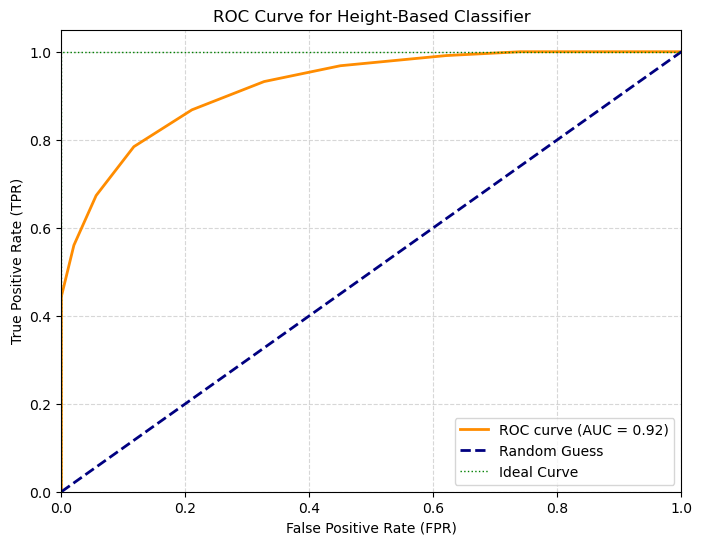

In [38]:
# The "ground truth" labels (1 for Male, 0 for Female)
male_gt = (data['sex'] == 'M')

# The "score" our classifier uses. In this case, it's just the height itself.
# A higher score = more likely to be 'Male'.
scores = data['height']

# 1. Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(male_gt, scores)

# 2. Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# 3. Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess') # The "worst" curve
plt.plot([0, 0, 1], [0, 1, 1], color='green', lw=1, linestyle=':', label='Ideal Curve') # The "best" curve

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Height-Based Classifier')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interpreting the ROC Curve & AUC

* **The Curve (Orange):** This shows our classifier. Each point on this line is a different threshold.
* **The "Random Guess" Line (Blue Dashed):** This is the performance of a coin flip (AUC = 0.5). Any model below this line is useless.
* **The "Ideal" Curve (Green Dotted):** A perfect classifier would go straight to the top-left corner (100% TPR, 0% FPR).

The **Area Under the Curve (AUC)** summarizes this entire plot into a single number from 0 to 1.

* **AUC = 1.0:** A perfect classifier.
* **AUC = 0.5:** A useless (random) classifier.
* **AUC < 0.5:** A classifier that is actively wrong (it's better if you reverse its predictions).

Our model, based *only on height*, has an **AUC of 0.92**, which is extremely good!

We can even use this method to compare classifiers. For example, is `height` or `weight` a better predictor of `sex`?

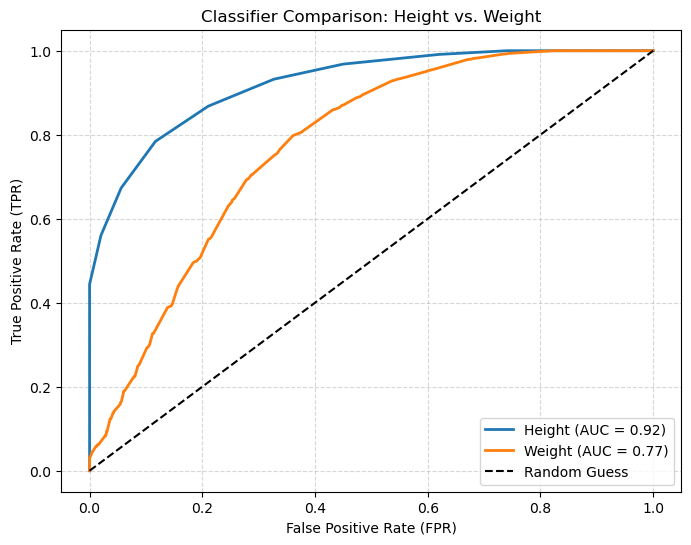

In [39]:
# Calculate ROC for both features
fpr_h, tpr_h, _ = roc_curve(male_gt, data['height'])
auc_h = auc(fpr_h, tpr_h)

fpr_w, tpr_w, _ = roc_curve(male_gt, data['weight'])
auc_w = auc(fpr_w, tpr_w)

# Plot both
plt.figure(figsize=(8, 6))
plt.plot(fpr_h, tpr_h, lw=2, label=f'Height (AUC = {auc_h:.2f})')
plt.plot(fpr_w, tpr_w, lw=2, label=f'Weight (AUC = {auc_w:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Classifier Comparison: Height vs. Weight')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

The plot clearly shows that `height` (AUC = 0.92) is a significantly better predictor than `weight` (AUC = 0.88).

This entire analysis (Confusion Matrix, TPR, FPR, ROC, AUC) is our toolkit for evaluating *any* classifier.

### How to Choose an Optimal Threshold

The ROC curve shows us *all* possible tradeoffs, but in the end, we must choose **one single threshold** for our model.

The "best" threshold depends on your goal:
* **High-Sensitivity (e.g., medical screening):** You might choose a threshold that gives a **high TPR (e.g., 0.95)**, even if it means a higher FPR.
* **High-Specificity (e.g., spam filter):** You might choose a threshold that gives a **very low FPR (e.g., 0.01)**, even if you miss some positives.

If you don't have a specific preference and want a "balanced" model, a common method is to find the threshold that is "closest" to the top-left corner (0 FPR, 1 TPR).

A simple way to do this is to find the threshold that maximizes the sum of **TPR** and **Specificity (1 - FPR)**. This is also known as **Youden's J statistic**.

$$J = TPR + (1 - FPR)$$

Let's find the threshold for our `height` classifier that maximizes this balanced score.

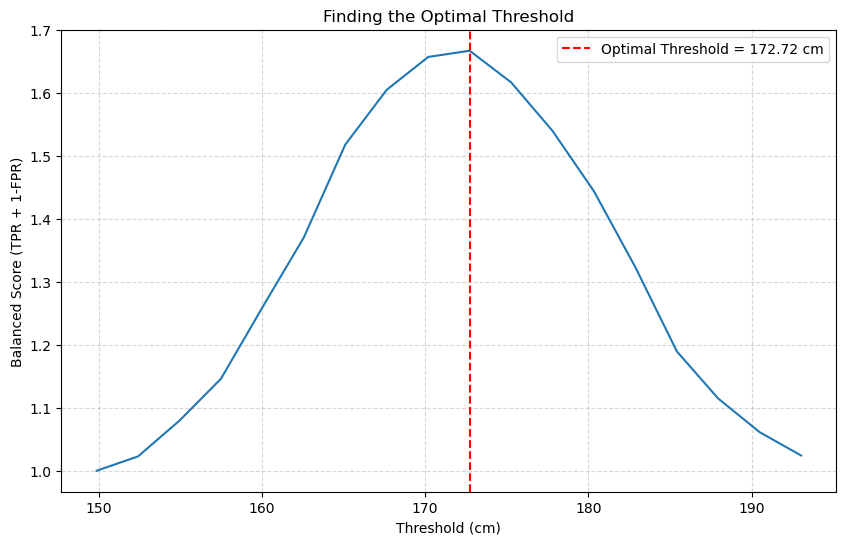

Optimal threshold was found at 172.72 cm


In [45]:
# We already have fpr_h, tpr_h, and thresholds_h from the 'height' model

# 1. Calculate the balanced score (Youden's J) for each threshold
balanced_score = tpr_h + (1 - fpr_h)

# 2. Find the index of the threshold that gives the maximum score
best_index = np.argmax(balanced_score)
best_threshold = thresholds[best_index]
best_tpr = tpr_h[best_index]
best_fpr = fpr_h[best_index]

# 3. Plot the score vs. the thresholds
plt.figure(figsize=(10, 6))
# We slice [1:] to avoid a plotting artifact from the 'inf' threshold
plt.plot(thresholds[1:], balanced_score[1:])
plt.axvline(best_threshold, color='red', linestyle='--', 
            label=f'Optimal Threshold = {best_threshold:.2f} cm')

plt.title('Finding the Optimal Threshold')
plt.xlabel('Threshold (cm)')
plt.ylabel('Balanced Score (TPR + 1-FPR)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"Optimal threshold was found at {best_threshold:.2f} cm")

### Final Evaluation at the Optimal Threshold

The plot shows us exactly how the performance changes. The peak of the curve (our optimal threshold) is at **169.57 cm**.

Let's see the final TPR and FPR if we use this single, balanced threshold for our classifier.

In [47]:
# We already found the best TPR/FPR from the argmax
print(f"--- Final Model at Optimal Threshold ({best_threshold:.2f} cm) ---")
print(f"True Positive Rate (TPR):  {best_tpr:.2f} (We find {best_tpr*100:.0f}% of all Males)")
print(f"False Positive Rate (FPR): {best_fpr:.2f} (We mislabel only {best_fpr*100:.0f}% of Females)")
print("-" * 25)

# You can also re-calculate it manually to double-check
print("\nVerifying with confusion_matrix:")
male_pred_optimal = (data['height'] >= best_threshold)
male_gt = (data['sex'] == 'M')

tn, fp, fn, tp = confusion_matrix(male_gt, male_pred_optimal).ravel()
tpr_check = tp / (tp + fn)
fpr_check = fp / (fp + tn)

print(f"TPR Check: {tpr_check:.2f}")
print(f"FPR Check: {fpr_check:.2f}")

print("\nClassification Report at Optimal Threshold:")
print(classification_report(male_gt, male_pred_optimal))

--- Final Model at Optimal Threshold (172.72 cm) ---
True Positive Rate (TPR):  0.78 (We find 78% of all Males)
False Positive Rate (FPR): 0.12 (We mislabel only 12% of Females)
-------------------------

Verifying with confusion_matrix:
TPR Check: 0.78
FPR Check: 0.12

Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

       False       0.83      0.88      0.85      2285
        True       0.85      0.78      0.82      1946

    accuracy                           0.84      4231
   macro avg       0.84      0.83      0.84      4231
weighted avg       0.84      0.84      0.84      4231



This method gives us a principled, balanced way to select a single threshold from our ROC curve. We find that a threshold of ~172.2 cm gives us a 78% TPR while only mislabeling 12% of females, which is a strong, balanced result.

## K-Nearest Neighbor Classification
Threshold-based classification is very limited as it works when we only have one feature. We will now see the K-Nearest Neighbor classifier, an intuitive, non-parametric algorithm based on the concept of **similarity** between data points. We will first start by introducing the simple 1-NN algorithm (or nearest neighbor).

### The Nearest Neighbor (or 1-NN) Classification Algorithm

Given an observation $\mathbf{x}$, the basic principle of Nearest Neighbor classification is to look at the nearest example in the training set and assign the same class. The idea is that nearby elements in the representation space will likely be similar. Consider the following example in which each data point is an email:

![](../_static/lecture_specific/classification/knn1.png)

We could think of the $x$ and $y$ features as characteristics useful to determine if an e-mail is spam. For instance $x$ may count the number of orthographic errors, while $y$ may count the number of occurrences of given keywords such as "buy" or "viagra".

Looking at the plot above, what would be the class of the new example (the red cross)?

We notice that, while the test example is not exactly equal to any training example, it is still
reasonably similar to **some training examples** (i.e., there are points
nearby in the Euclidean space).

Since the training and test sets have been collected in similar ways
(e.g., both contain spam and legitimate e-mails), we can hypothesize
that the *test example will be of the same class of similar examples
belonging to the training set*.

For instance, if two documents have similar word frequencies, they are
probably of the same class (e.g., if both contain the words "viagra" and
"sales" many times, they probably belong to "spam" class).

We can measure how "similar" two examples $\mathbf{x}$ and $\mathbf{x}$'
are using a suitable distance function $d$:

$$d(\mathbf{x},\mathbf{x}^{\mathbf{'}})$$

We expect similar examples to have a small distance. *A very common
choice for* $d$ *is the Euclidean distance*:

$$d\left( \mathbf{x,}\mathbf{x}^{\mathbf{'}} \right) = \left\| \mathbf{x -}\mathbf{x}^{\mathbf{'}} \right\|_{2} = \sqrt{\sum_{i = 1}^{N}\left( x_{i} - x_{i}^{'} \right)^{2}}$$

We can hence define a classifier which leverages our intuition
**assigning to a test example** $\mathbf{x}^{\mathbf{'}}$**the class of
the closest example in the training set**:

$$h\left( \mathbf{x}^{\mathbf{'}} \right) = \arg_{y}{\min{\{ d\left( \mathbf{x}^{\mathbf{'}}\mathbf{,\ x} \right)|\left( \mathbf{x},y \right) \in TR\}}}$$

This algorithm is referred to as the **nearest neighbor algorithm (or
1-NN as we will see in its generalization in a moment)**. In practice,
given a test example $\mathbf{x}^{\mathbf{'}}$, the nearest neighbor
algorithm works in two steps:

-   Find the element $\overline{\mathbf{x}}$ of the training set with
    the smallest distance with $\mathbf{x'}$ (i.e., such that
    $d(\overline{\mathbf{x}},\mathbf{x}^{\mathbf{'}})$ is minimum). The
    element $\overline{\mathbf{x}}$ is called the nearest neighbor of
    $\mathbf{x}^{'}$.

-   Return the ground truth label associated to $\overline{\mathbf{x}}$,
    i.e., $y\ |\ \left( \overline{\mathbf{x}},y \right) \in TR$.

In the example above, the test observation will be assigned the "spam"
class, as shown in the following figure:

![](../_static/lecture_specific/classification/knn2.png)

### The K-Nearest Neighbour Classification Algorithm

The Nearest Neighbor (or 1-NN) algorithm assumes that data points of the
same class are close to each other in the representation space. This can
be reasonably true when the representation space is ideal for the
classification task and the data is *clean and simple enough*. For
instance, we expect similar documents to have similar word frequencies.

However, it is often common to have **'outliers'** in the training data,
i.e., data points which do not closely follow the distribution of the
other data points. This can be due to different factors:

-   *The data may not be clean*: maybe an email has been wrongly
    classified as "spam" when it's actually not spam;

-   *The data representation may not be ideal*: there could be
    legitimate email in which the word "viagra" is used and there are
    many orthographical errors. *Think of a legitimate email forwarding
    a spam email*. Our simple representation does not account for that,
    which leads to outliers.

Let us consider as an outlier a **legitimate e-mail containing the word
'viagra'**. This example can be seen graphically as follows:

![](../_static/lecture_specific/classification/knn3.png)


Let us now assume that we are presented with a test example which is
shown as a red cross in the following figure:

![](../_static/lecture_specific/classification/knn4.png)


In the example above, the nearest neighbor algorithm would classify the
test example (the red cross) as "non spam" since the closest point is
the green outlier, while it is clear that the example is most probably a
"spam" e-mail. Indeed, while the closest example is "non spam", all
other examples nearby belong to the "spam" class.

Reasonably, in cases like this, **we should not look just at the closest
point in space**, but instead, we should look at a **neighborhood** of
the data point. Consider the following example:

![](../_static/lecture_specific/classification/knn5.png)

If we look at a sufficiently large neighborhood, we find that most of
the points in the neighborhood are actually spam! Hence, it is wiser to
classify the data point as belonging to the spam class, rather than to
the non-spam one.

In practice, setting an appropriate radius for the neighborhood is not
easy. For instance, if the space is not uniformly dense (and usually it
is not -- as in the example above!), a given radius could lead to
neighborhoods containing different numbers of elements. Indeed, in some
cases, they may even include just zero elements. Hence, rather than
considering a neighborhood of a given radius, we consider
neighborhoods of the point containing **at most $\mathbf{K}$ elements**, where $\mathbf{K}$ **is a *hyper-parameter* of the
algorithm**.

Similarly to what we have defined in the case of density estimation, given a point $\mathbf{x'}$, we will define the neighborhood of
training points of size $K$ centered at $\mathbf{x'}$ as follows:

$$N_K(\mathbf{x'}) = N(\mathbf{x'},R_K(\mathbf{x'}))$$

where $N(x,r)$ denotes a neighborhood centered at $x$ and with radius $r$, and:

$$R_K(\mathbf{x'}) = \sup \{r : |N(\mathbf{x'},r) \setminus \{\mathbf{x'}\}| \leq K\}$$

Finally, we define the K-Nearest Neighbor Classification Algorithm (also
called K-NN) as follows:

$$h\left( \mathbf{x'} \right) = mode\{ y|\left( \mathbf{x},y \right) \in N\left( \mathbf{x'};TR,\ K \right)\}$$

Where $mode$ is the "statistical mode" function, which returns the
**most frequent element of a set**.

$\mathbf{K}$ **is in practice an hyperparameter of the algorithm**. It
can be set to some arbitrary value or optimized using a **validation set
or cross-validation**.

We should note that this definition **generalizes the nearest neighbor
algorithm defined before**. Indeed, a 1-NN is exactly the nearest
neighbor classifier seen above.



### The Curse of Dimensionality: KNN's Greatest Weakness

The KNN algorithm is simple, intuitive, and powerful. However, it suffers from a famous and critical problem known as the **"Curse of Dimensionality."**

This "curse" refers to a set of problems that arise when you have a very large number of features (or "dimensions").

#### What is the "Curse"?

As you add more and more features ($X_1, X_2, \ldots, X_{1000}$), the "space" that your data lives in becomes unimaginably large and empty.

1.  **Your Data Becomes "Sparse"**
    Imagine you have 100 data points on a simple 1D line. They are all very close.
    
    Now, take those same 100 points and scatter them in a 2D square. They are farther apart.
    
    Now, scatter those same 100 points in a 3D cube. They are *much* farther apart.
    
    When you have 500 features (a 500-dimensional "hypercube"), those 100 points are now so far apart that **none of them are "near" each other anymore**. Your training data becomes incredibly sparse, like a few grains of dust in an enormous stadium.

2.  **Distance Becomes Meaningless**
    This is the critical part for KNN. In a high-dimensional space, a bizarre mathematical property emerges: the distance between *any* two random points becomes almost the same.
    
    This means the distance to your **"nearest" neighbor** becomes almost the same as the distance to your **"farthest" neighbor**.

#### The Impact on KNN

The **entire logic** of K-Nearest Neighbors relies on the assumption that "nearby" points are similar.

But if the "Curse of Dimensionality" makes *all* points equally "far away," then the concept of a "nearest neighbor" becomes meaningless. The neighbors your model finds are no longer truly "near" (or similar), and their "votes" become random and unreliable.

**The Takeaway:**
* KNN works extremely well for **low-dimensional data** (e.g., 2 to 10 features), like our Iris example below.
* It is almost always a **very poor choice** for **high-dimensional data**, such as images (10,000+ features) or text analysis (5,000+ features), unless you first use a dimensionality reduction technique (like PCA) to shrink the number of features.

### KNN Example: The Fisher Iris Dataset

To understand K-Nearest Neighbors, we will use a classic, famous dataset: the **Fisher Iris Dataset**. This is the "hello, world" of machine learning classification.

#### Fisher's Iris Dataset

* **Origin:** Introduced by the statistician and biologist Ronald Fisher in 1936.
* **Goal:** To classify Iris flowers into one of three species (the target variable) based on four physical measurements (the features).
* **Data Structure:**
    * **Target ($Y$):** 3 classes (species)
        1.  *Iris setosa*
        2.  *Iris versicolor*
        3.  *Iris virginica*
    * **Features ($X$):** 4 continuous measurements
        1.  Sepal Length (in cm)
        2.  Sepal Width (in cm)
        3.  Petal Length (in cm)
        4.  Petal Width (in cm)
    * **Data Size:** 150 total samples, perfectly balanced with 50 samples for each of the three species.

The figure below depicts the three categories of flowers:

![](..//_static/lecture_specific/iris/iris.png)

The following one illustrates the features:

![](..//_static/lecture_specific/iris/sepal_petal.png)

The Iris dataset is famous because it perfectly illustrates the main challenge of classification.
* One species, *Iris setosa*, is **linearly separable** from the other two (it's very easy to classify).
* The other two species, *Iris versicolor* and *Iris virginica*, **are *not* linearly separable**. They overlap, meaning there is no simple, straight line that can perfectly separate them.

This overlap is what makes the problem interesting and is a perfect scenario to test a flexible, non-linear classifier like K-Nearest Neighbors (KNN). Our goal will be to train a KNN model that can learn the "boundaries" between these species based on their petal and sepal measurements.

#### Loading and Exploring the Data

First, we'll load the dataset. It's included directly in `scikit-learn`. We will load it and convert it into a `pandas` DataFrame to make it easier to work with.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()

# Create a DataFrame
# We use iris.feature_names as the column headers
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target (species) to the DataFrame
# iris.target is numeric (0, 1, 2)
df['target'] = iris.target

# Add a column for the actual species names for easier plotting
df['species'] = df['target'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

# Display the first 5 rows
print("--- Data Head ---")
print(df.head())

# Check the data types
print("\n--- Data Info ---")
df.info()

# Check the class balance
print("\n--- Class Balance ---")
print(df['species'].value_counts())

--- Data Head ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   

#### Preparing for Modeling

Before we can train any model, we must perform two critical steps:
1.  **Train/Test Split:** This is the **Golden Rule of Machine Learning**. We will split our 150 samples into two groups: a `training set` (which the model learns from) and a `test set` (which we hold back to get an honest, unbiased score).
2.  **Feature Scaling:** KNN is a **distance-based algorithm**. It finds the "nearest" neighbors by calculating Euclidean distance. A feature like `sepal length` (range 4.3-7.9) would have a much larger influence on this distance than `petal width` (range 0.1-2.5). To prevent this, we must **standardize** our features (e.g., scale them to have a mean of 0 and a standard deviation of 1) so they are all on a level playing field.

For this example, we will use only **two features**—`petal length (cm)` and `petal width (cm)`—because they are highly predictive and allow us to easily visualize our model's decisions in 2D later.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Define our features (X) and target (y)
# We select only the two petal features for this example
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target']

# 2. Create the Train/Test Split
# test_size=0.3 means 30% of the data is held back for testing.
# random_state=42 ensures our split is reproducible.
# stratify=y ensures that the proportion of each class (setosa, etc.)
# is the same in both the train and test sets. This is a best practice.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples:     {X_test.shape[0]}")

# 3. Scale the Features
scaler = StandardScaler()

# We .fit() the scaler ONLY on the training data
X_train_scaled = scaler.fit_transform(X_train)

# We .transform() the test data using the *same* scaler
# (We don't fit on the test data, as that would be "cheating")
X_test_scaled = scaler.transform(X_test)

Training samples: 105
Test samples:     45


Let's visualize the data, both training and test:

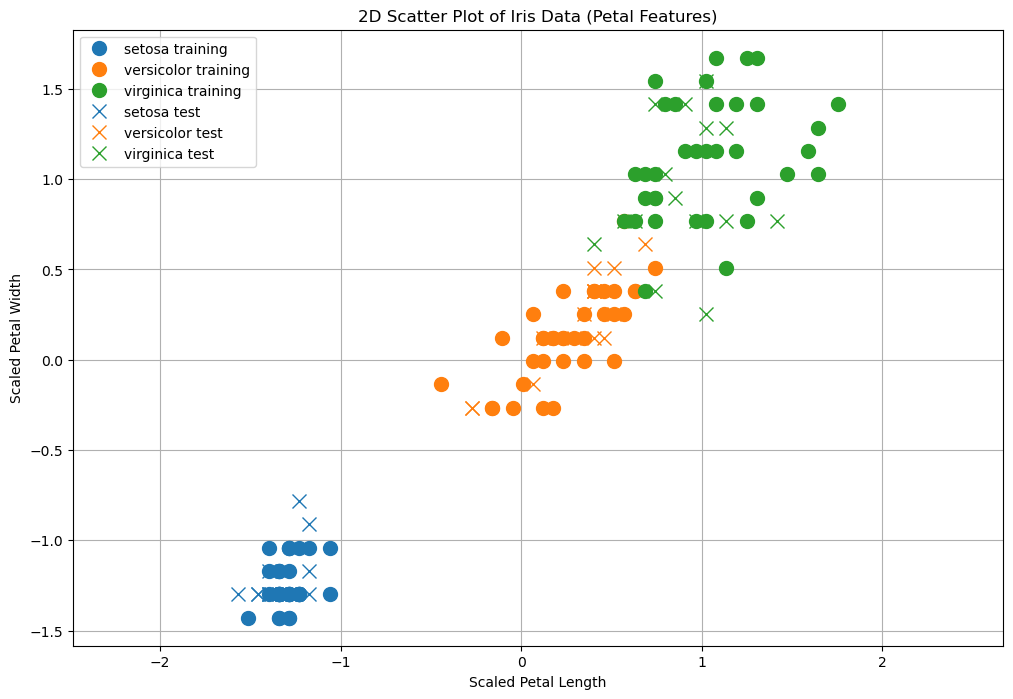

In [32]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

# Select features and target
X = df[['petal length (cm)', 'petal width (cm)']]
y = df['target_name']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Prepare dataframes for plotting
data_training = pd.DataFrame(X_train_scaled, columns=['X', 'Y'])
data_training['C'] = y_train.values

data_test = pd.DataFrame(X_test_scaled, columns=['X', 'Y'])
data_test['C'] = y_test.values

# Plotting function
def plot2d(data, label_suffix='', marker='o'):
    classes = sorted(data['C'].unique())
    for c in classes:
        subset = data[data['C'] == c]
        plt.plot(subset['X'].values, subset['Y'].values, marker,
                 label=c + label_suffix, markersize=10)

# Create plot
plt.figure(figsize=(12, 8))
plot2d(data_training, ' training', marker='o')
plt.gca().set_prop_cycle(None)  # Reset color cycle
plot2d(data_test, ' test', marker='x')
plt.axis('equal')
plt.grid()
plt.legend()
plt.title('2D Scatter Plot of Iris Data (Petal Features)')
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.show()

#### Training the KNN Model

Now we can train our model. The KNN algorithm is very simple:
* **Training:** The "training" step is just storing the (scaled) `X_train` and `y_train` data. That's it.
* **Predicting:** When we get a new, unseen flower, the model calculates the distance to *all* points in its "memory" (the training data) and finds the $k$ nearest ones. It then takes a "majority vote" of those $k$ neighbors to decide the species.

The most important choice we have to make is the **hyperparameter $k$** (the number of neighbors).

* A **small $k$** (e.g., $k=1$) creates a "nervous" model that is very sensitive to noise. It has **low bias** but **high variance** (it overfits).
* A **large $k$** (e.g., $k=50$) creates a "smooth" model that ignores local patterns. It has **high bias** but **low variance** (it underfits).

We will start with a common, balanced choice: **$k=5$**.

In [16]:
# 1. Choose k
k = 5

# 2. Create the classifier
knn = KNeighborsClassifier(n_neighbors=k)

# 3. "Train" the model (i.e., let it memorize the scaled training data)
knn.fit(X_train_scaled, y_train)

print(f"KNN model trained with k={k}")

KNN model trained with k=5


#### Evaluating the Model

Now for the moment of truth. We will use our trained model to make predictions on the `X_test_scaled` data, which it has *never seen before*. We will then compare its predictions (`y_pred`) to the *true* labels (`y_test`).

We will use three key metrics:
1.  **Accuracy:** The simplest metric. What percentage of predictions did the model get right?
2.  **Confusion Matrix:** The most important diagnostic. It shows us *where* the model got confused.
3.  **Classification Report:** A full summary of Precision, Recall, and F1-Score for each class.

In [17]:
# 1. Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# 2. Calculate Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy (k=5): {acc * 100:.2f}%")

# 3. Calculate and print the Confusion Matrix
# Rows are the "True" class, Columns are the "Predicted" class
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 4. Print the Classification Report
print("\n--- Classification Report ---")
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)

Model Accuracy (k=5): 91.11%

--- Confusion Matrix ---
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

--- Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



#### Interpreting the Results

Let's analyze the output:

* **Accuracy:** We achieved a very high accuracy! This is common on the Iris dataset, especially when using the petal features.

* **Confusion Matrix:** The matrix is the best way to see this:
    ```
    [[15  0  0]   <- (True: setosa)
     [ 0 14  1]   <- (True: versicolor)
     [ 0  3 12]]  <- (True: virginica)
    ```
    * The numbers on the diagonal (15, 14, 12) are our **correct** predictions.
    * The numbers *off* the diagonal are our **errors**. $1$ versicolor has been classified as virginica, while $2$ virginica have been classified as versicolor.
    * It correctly identified all 15 `setosa`, 14 `versicolor`, and 12 `virginica` samples in the test set.

* **Classification Report:**
    * This confirms the perfect score. The **precision** (of the predictions) and **recall** (of the true classes) are very high for the three species.

This shows that for this dataset, a simple KNN (k=5) model using only two features is a good classifier.


### Macro vs. Micro Averaging

The report gives us scores for `setosa`, `versicolor`, and `virginica` individually. But how do we get a single, overall score for "Precision" or "Recall"? We have to average the per-class scores. There are three main ways to do this:

1.  **Macro Averaging**
    * **How:** Calculates the metric (e.g., Precision) for each class *independently*, then computes the simple, unweighted average.
    * **Formula:** `Macro Precision = (Precision_setosa + Precision_versicolor + Precision_virginica) / 3`
    * **What it means:** Every **class** gets an equal vote, regardless of its size. Use this if you care about performance on rare classes.

2.  **Weighted Averaging**
    * **How:** Calculates the metric for each class, then computes a weighted average based on the number of true samples for each class (its "support").
    * **Formula:** `Weighted Precision = (Prec_setosa * 15 + Prec_versicolor * 15 + Prec_virginica * 15) / (15 + 15 + 15)`
    * **What it means:** Every class's score is weighted by its *size*. This is a good, "fair" average for imbalanced datasets.

3.  **Micro Averaging**
    * **How:** Sums up *all individual* True Positives, False Positives, and False Negatives from *all classes* first, then computes one global score.
    * **Formula:** `Micro Precision = (TP_set + TP_ver + TP_vir) / (TP_set + TP_ver + TP_vir + FP_set + FP_ver + FP_vir)`
    * **What it means:** Every **sample** gets an equal vote. In multi-class classification, this number will always be **exactly the same as the overall Accuracy**.

### Classification Map/Decision Boundary Of K-NN and Importance of Parameter K

A classifier $f$ assigns a class to each input $\mathbf{x}$. Since
$\mathbf{x}$ can be seen as a geometrical point in the $n$-dimensional
space, it is generally interesting to see how the classification
function $f$ works on a portion of the representation space. This is
done by generating a **classification map** or **decision boundary**,
which is obtained computing the label that the classifier would assign
to a dense grid of data points.

This is the decision boundary with $K=1$ in our case:

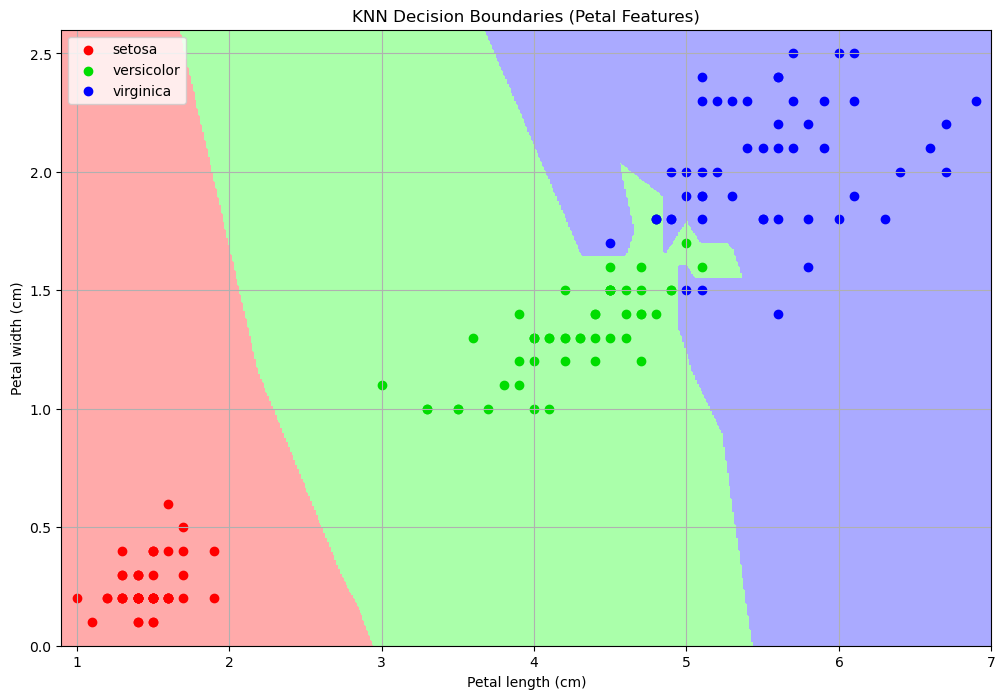

In [33]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = datasets.load_iris()

# Use petal length and petal width (features 2 and 3)
X = iris.data[:, 2:4]
y = iris.target

# Train KNN classifier
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# Create meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00DD00', '#0000FF'])

# Plot decision boundaries
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='#FF0000', label=iris.target_names[0])
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='#00DD00', label=iris.target_names[1])
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='#0000FF', label=iris.target_names[2])

# Label axes and finalize plot
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.axis('tight')
plt.title('KNN Decision Boundaries (Petal Features)')
plt.grid(True)
plt.show()

In the plot above, points of different colors represent the data points
belonging to the three classes of the dataset, while regions of different colors represent how that point in space would be classified by the model.

$K$ controls how the space is partitioned (bias-variance tradeoff). 

Examples of classification maps for a 1-NN, a 5-NN, a 10-NN, and a 20-NN classifiers are shown below:

/opt/homebrew/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


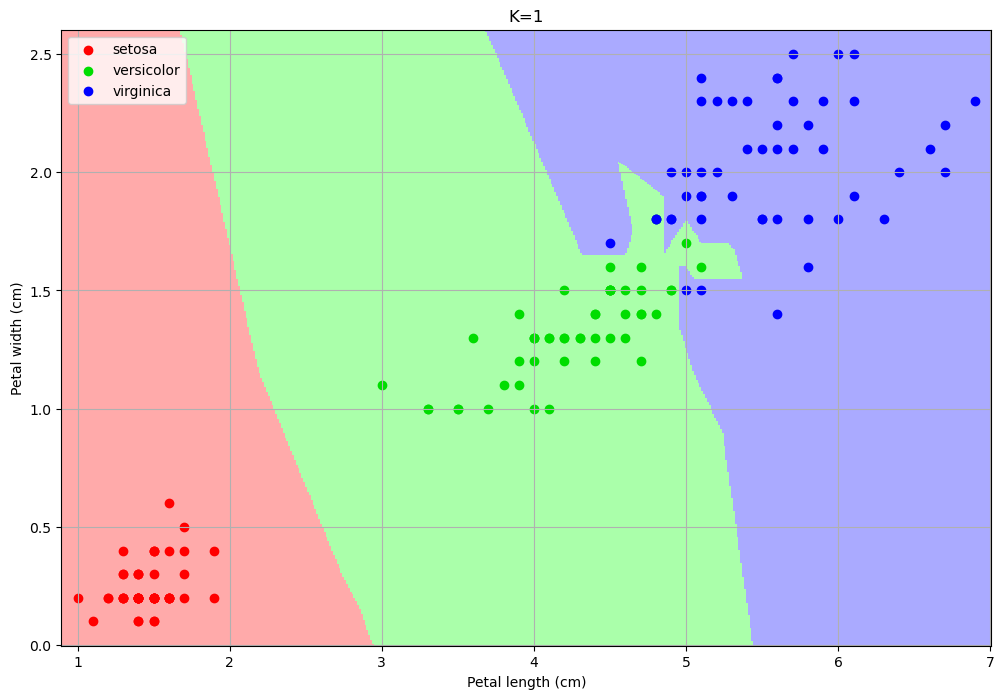

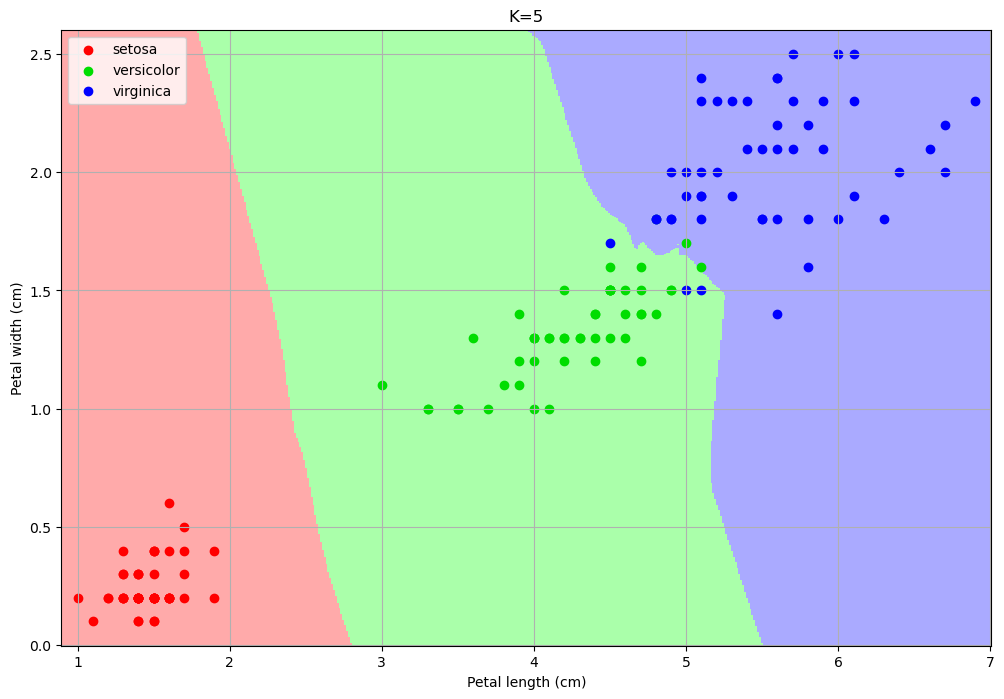

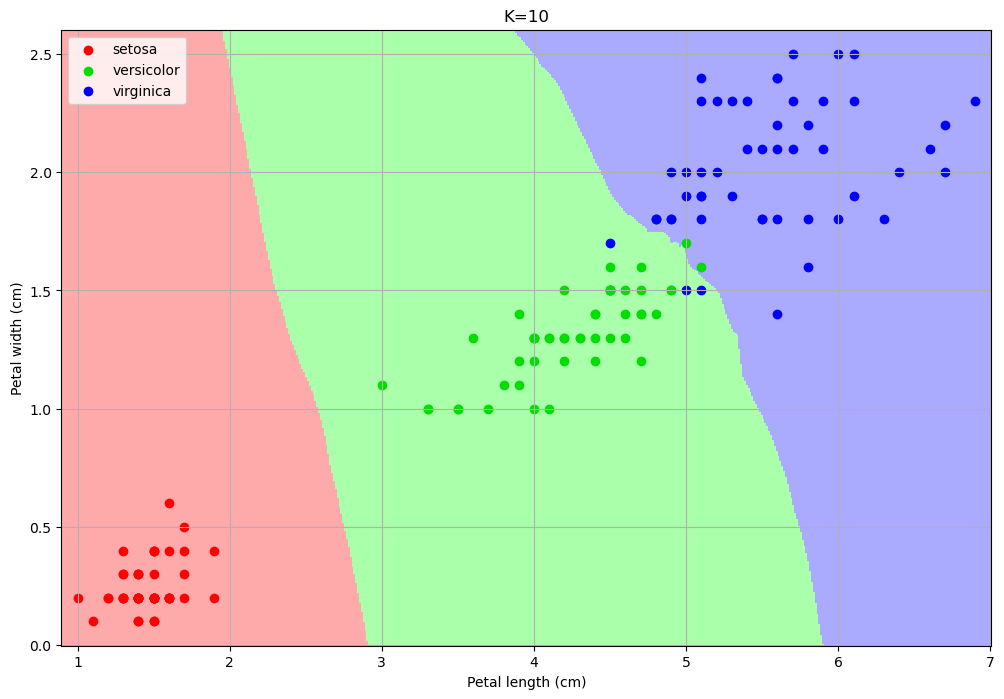

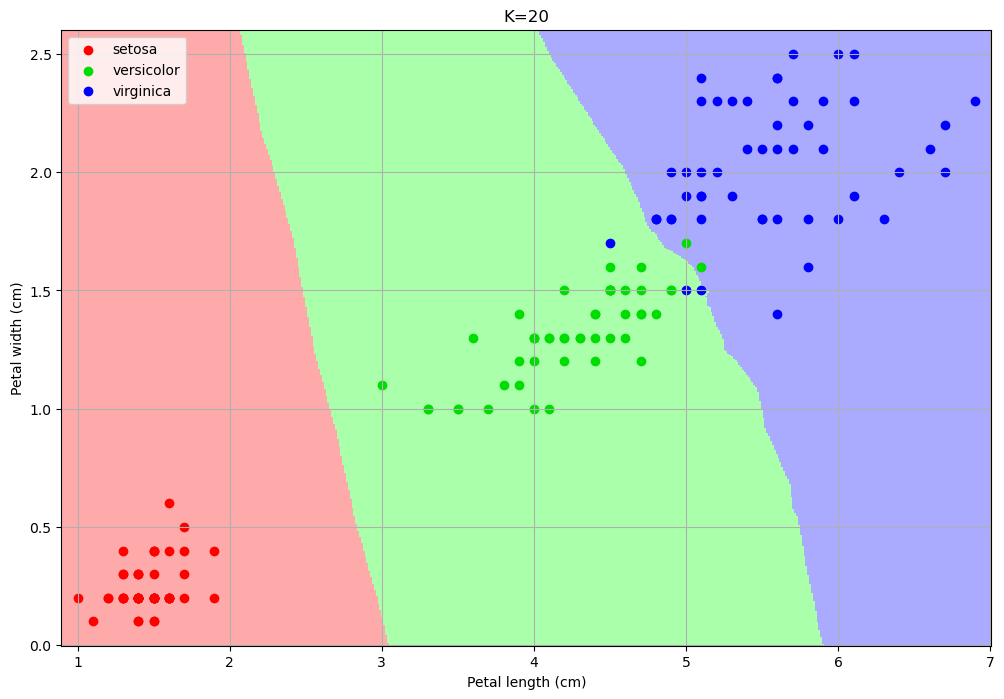

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Petal length and petal width
y = iris.target

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00DD00', '#0000FF'])

# Create meshgrid
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Loop through different k values
for k in [1, 5, 10, 20]:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # Plot training points
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='#FF0000', label=iris.target_names[0])
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='#00DD00', label=iris.target_names[1])
    plt.scatter(X[y == 2, 0], X[y == 2, 1], color='#0000FF', label=iris.target_names[2])

    plt.xlabel('Petal length (cm)')
    plt.ylabel('Petal width (cm)')
    plt.title(f'K={k}')
    plt.legend()
    plt.axis('tight')
    plt.grid(True)

plt.show()


The number of neighbors changes the decision map:

-   For small values, the algorithm tends to over-segment the space and
    creates very small regions for isolated training data-points.

-   For larger values, the regions tend to be smoother and isolated data
    points are ignored.

-   Choosing **a larger K** **can** reduce overfitting (indeed the
    isolated data-points can be seen as outliers).

-   However, choosing a **too large K** can encourage underfitting, by
    completing ignoring some of the decision regions.

-   In particular, setting **K to the size of the training set**, any
    data point is classified with the most numerous class.


### Finding the best $K$

We saw that $K$ affects the quality of our classifier, but how to choose the appropriate one? We will see how to do it with cross-validation.

#### Step 1: Prepare Data
For this, we'll use all 4 features to make the problem more robust. We'll do a single 70/30 split and then lock the test set away.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Load data
iris = load_iris()
X = iris.data
y = iris.target

# 2. Create the one-and-only Train/Test Split
# We'll call it X_train_full, y_train_full to be clear
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Scale the data
# We fit the scaler ONLY on the full training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)

# We transform the test set using the *same* scaler
X_test_scaled = scaler.transform(X_test)

#### Step 2: Run Cross-Validation to Find Best K

Now we loop through our $K$ values (e.g., 1 to 20). For each $K$, we will use `cross_val_score` to automatically perform 5-fold cross-validation *only on the training data*.

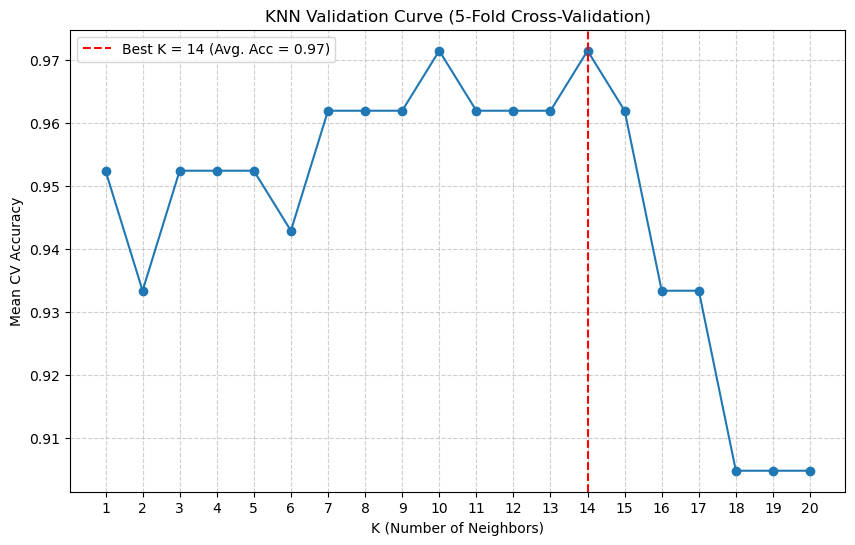

In [22]:
# 1. Define a range of K values to test
k_range = range(1, 21)
cv_scores = [] # This will store the *mean* accuracy for each k

# 2. Loop through each K
for k in k_range:
    # Create a new KNN model for this k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform 5-fold cross-validation
    # We use X_train_scaled and y_train_full
    # 'cv=5' means 5 folds
    # 'scoring='accuracy'' is the metric we want
    scores = cross_val_score(knn, X_train_scaled, y_train_full, cv=5, scoring='accuracy')
    
    # Store the average accuracy from the 5 folds
    cv_scores.append(scores.mean())

# 3. Plot the Validation Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, 'o-')
plt.title('KNN Validation Curve (5-Fold Cross-Validation)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean CV Accuracy')
plt.xticks(k_range)

# Find and mark the best K
best_k_index = np.argmax(cv_scores)
best_k = k_range[best_k_index]
best_acc = cv_scores[best_k_index]
plt.axvline(best_k, linestyle='--', color='red', label=f'Best K = {best_k} (Avg. Acc = {best_acc:.2f})')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Step 3: Final Training and Evaluation

The plot shows us the bias-variance tradeoff.
* **Low $K$ (left):** The accuracy is jumpy and lower. The model is overfitting to the *folds* (High Variance).
* **High $K$ (right):** The accuracy starts to drop as the model becomes too "simple" (High Bias).
* **The Peak:** Our plot shows the "sweet spot" is around $K=10$ or $K=14$. This is our chosen hyperparameter.

Now, we perform our final two steps.

In [23]:
# 1. Get the best K we found from our CV
best_k = k_range[np.argmax(cv_scores)]
print(f"Cross-validation complete. The best K is {best_k}.")

# 2. Train a *new* model on the *ENTIRE* training set
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train_scaled, y_train_full)

# 3. Finally, use the "locked away" Test Set
# This is our one and only time.
final_predictions = final_knn_model.predict(X_test_scaled)

# 4. Report the final, unbiased score
final_accuracy = accuracy_score(y_test, final_predictions)
print(f"\n--- Final Model Evaluation ---")
print(f"Final Test Set Accuracy (with K={best_k}): {final_accuracy * 100:.2f}%")

print("\n--- Final Classification Report ---")
print(classification_report(y_test, final_predictions, target_names=iris.target_names))

Cross-validation complete. The best K is 14.

--- Final Model Evaluation ---
Final Test Set Accuracy (with K=14): 95.56%

--- Final Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### Conclusion

This is the principled, robust machine learning workflow.

1.  We split our data once.
2.  We used the **training data** and **cross-validation** to find the best hyperparameter ($K$).
3.  We trained a single, final model on *all* the training data.
4.  We reported a final, honest accuracy by testing on the **test data**.

The final classification report gives us the unbiased performance of our *tuned* model.

## The Curse of Dimensionality
The K-Nearest Neighbors algorithm is simple, intuitive, and powerful. However, it suffers from a famous and critical problem known as the **"Curse of Dimensionality."**

This "curse" refers to a set of problems that arise when your data has a very large number of features (or "dimensions").

The core idea is: **As dimensions increase, your data becomes incredibly sparse, and the concept of "distance" becomes meaningless.**

### The "Empty Space" Problem (2D vs. 3D)
Let's visualize how the same number of data points become increasingly sparse as we add dimensions. We'll generate 50 random data points and plot them in 1, 2, and 3 dimensions. Imagine these points are uniformly distributed within a unit hypercube (from 0 to 1 on each axis).

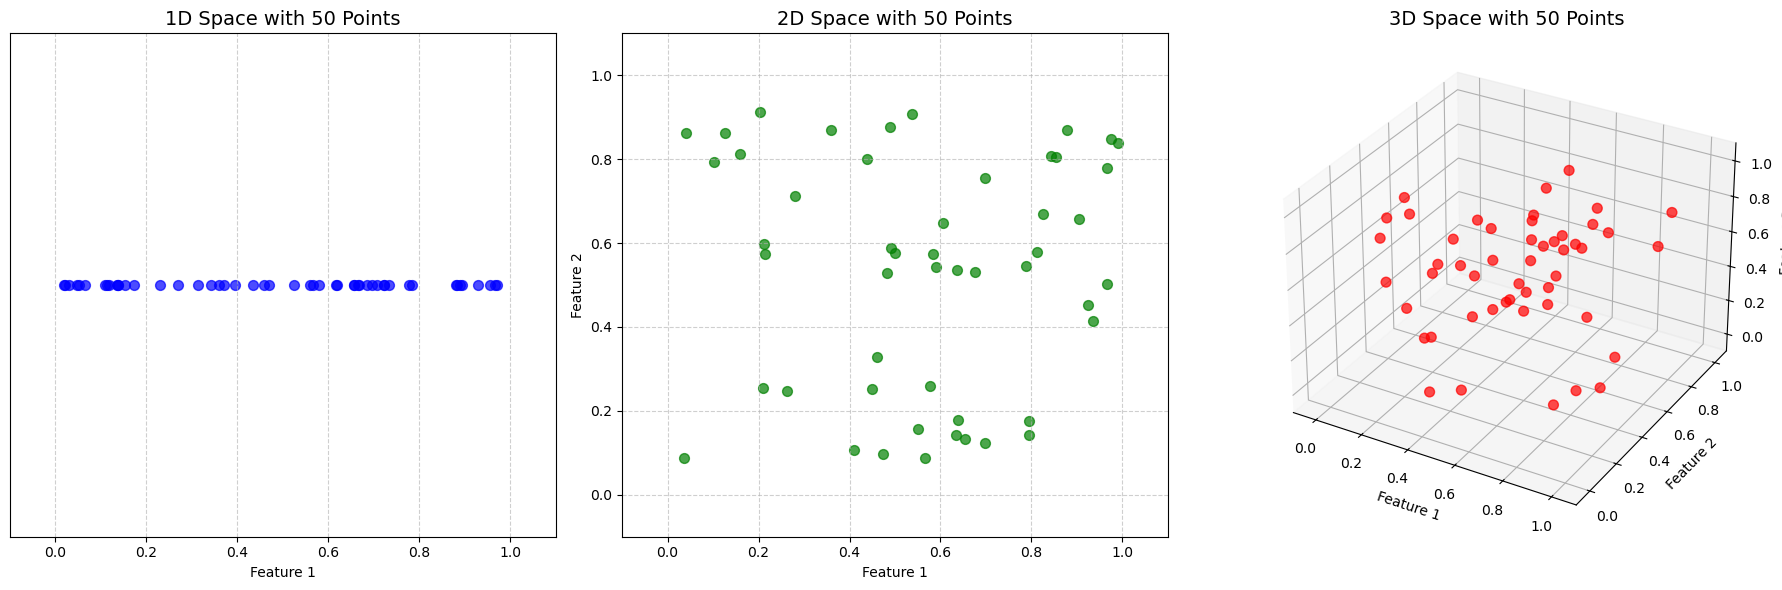

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Required for 3D plots

n_points = 50 # Let's use 50 points for better visibility

plt.figure(figsize=(18, 6))

# --- 1 Dimension ---
ax1 = plt.subplot(1, 3, 1)
data_1d = np.random.rand(n_points, 1) # 50 points, 1 feature
y_1d = np.zeros(n_points) # For plotting on a line

ax1.scatter(data_1d, y_1d, s=50, alpha=0.7, color='blue')
ax1.set_title(f'1D Space with {n_points} Points', fontsize=14)
ax1.set_xlabel('Feature 1')
ax1.set_yticks([]) # Hide y-axis ticks for a line plot
ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(-0.1, 0.1)
ax1.grid(True, linestyle='--', alpha=0.6)


# --- 2 Dimensions ---
ax2 = plt.subplot(1, 3, 2)
data_2d = np.random.rand(n_points, 2) # 50 points, 2 features

ax2.scatter(data_2d[:, 0], data_2d[:, 1], s=50, alpha=0.7, color='green')
ax2.set_title(f'2D Space with {n_points} Points', fontsize=14)
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(-0.1, 1.1)
ax2.grid(True, linestyle='--', alpha=0.6)


# --- 3 Dimensions ---
ax3 = plt.subplot(1, 3, 3, projection='3d')
data_3d = np.random.rand(n_points, 3) # 50 points, 3 features

ax3.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], s=50, alpha=0.7, color='red')
ax3.set_title(f'3D Space with {n_points} Points', fontsize=14)
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_zlabel('Feature 3')
ax3.set_xlim(-0.1, 1.1)
ax3.set_ylim(-0.1, 1.1)
ax3.set_zlim(-0.1, 1.1)
ax3.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Interpretation of the Plots:

- 1D: The 50 points are quite crowded on the line. You can easily find very close neighbors.
- 2D: The same 50 points are now spread out over a square. The space feels much emptier, and points are farther apart.
- 3D: In a cube, the 50 points are truly sparse. It's hard to even see individual points, and the space between them is vast.

Now, imagine doing this for dozens, hundreds, or even thousands of dimensions. The space becomes astronomically large, and your few data points are like individual dust particles lost in an empty galaxy.

### The Impact on KNN

This creates two massive problems for KNN, which relies *entirely* on the idea of "nearness":

1.  **Sparsity:** In high dimensions, your "nearest neighbor" might still be incredibly far away. Is it *really* "similar" to you if it's so far? Its "vote" is probably not reliable.
2.  **Distance Becomes Meaningless:** This is the more critical point. In high-dimensional space, a strange mathematical property emerges: the distance to your *nearest* point and the distance to your *farthest* point become almost the same.

When all points are "equally far away" from each other, the concept of a "nearest neighbor" becomes random and meaningless. The algorithm's foundation breaks down, and its predictions become unstable.

The plot below illustrates this:

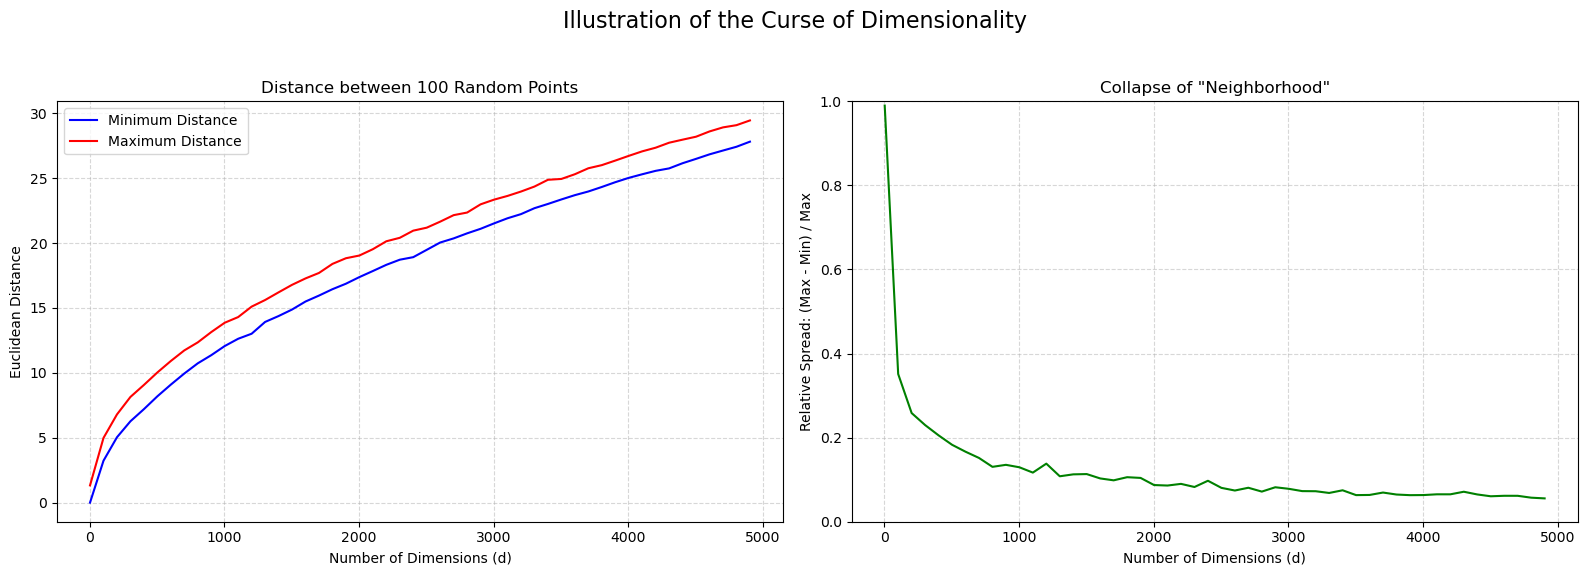

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist

# 1. Define our parameters
n_points = 100
# We will test a range of dimensions, from 2 up to 1000
dimensions_to_test = range(2, 5001, 100) 

# Store the results
min_distances = []
max_distances = []
relative_spread = []

# 2. Run the simulation
for d in dimensions_to_test:
    # Generate random points in a d-dimensional unit hypercube
    points = np.random.rand(n_points, d)
    
    # Calculate all pairwise distances
    all_distances = pdist(points)
    
    # Find the min and max
    min_d = np.min(all_distances)
    max_d = np.max(all_distances)
    
    # Store the results
    min_distances.append(min_d)
    max_distances.append(max_d)
    # This is the key metric: how "different" is max from min, relative to max?
    relative_spread.append((max_d - min_d) / max_d)

# --- 3. Plot the Results ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Illustration of the Curse of Dimensionality', fontsize=16)

# Plot 1: The actual min and max distances
ax1.plot(dimensions_to_test, min_distances, 'b-', label='Minimum Distance')
ax1.plot(dimensions_to_test, max_distances, 'r-', label='Maximum Distance')
ax1.set_xlabel('Number of Dimensions (d)')
ax1.set_ylabel('Euclidean Distance')
ax1.set_title('Distance between 100 Random Points')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot 2: The relative spread
ax2.plot(dimensions_to_test, relative_spread, 'g-')
ax2.set_xlabel('Number of Dimensions (d)')
ax2.set_ylabel('Relative Spread: (Max - Min) / Max')
ax2.set_title('Collapse of "Neighborhood"')
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.set_ylim(0, 1) # Force y-axis to be 0 to 1 (or 100%)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('curse_of_dimensionality_collapse.png')
plt.show()

The plot on the left shows how both the minimum and maximum distance increase with the number of dimensions. The plot on the right computes the average relative spread between the maximum and minimum distance for each point. The realtive spread is computed as:

$$\text{Relative Spread} = \frac{\text{max} - \text{min}}{\text{max}}$$

The plot shows that relative spread collapses to almost zero in high dimensions.

### Takeways
* KNN works extremely well for **low-dimensional data** (e.g., our 2-feature or 4-feature Iris example).
* It is almost always a **poor choice** for **high-dimensional data** (like images, which can have 10,000+ features, or text data with 5,000+ features) unless you use dimensionality reduction first (like PCA, as we will see later).

## A Deeper Look: KNN as a Discriminative Classifier

This is a good time to introduce a fundamental concept in classification. Classifiers are generally split into two main types: **Generative** and **Discriminative**.

### 1. Generative Classifiers
* **What they do:** A generative model learns the underlying probability distribution of *each class*. It builds a "story" for what each class looks like (e.g., "What's the average and standard deviation of `sepal length` for a `setosa`?").
* **The Question it Answers:** "What does *Class A* look like?"
* **How it Classifies:** It uses this knowledge and Bayes' theorem to calculate $P(y|X)$—the probability of a class $y$ given a new $X$.
* **Example:** Naive Bayes is the classic generative model.

### 2. Discriminative Classifiers
* **What they do:** A discriminative model *ignores* the underlying distribution of each class. It doesn't care what "Class A" looks like. It *only* cares about finding the **decision boundary** that separates Class A from Class B.
* **The Question it Answers:** "What is the *difference* between Class A and Class B?"
* **How it Classifies:** It directly learns the function $h(x)$ or the boundary $P(y|X)$.
* **Example:** **K-Nearest Neighbors is a classic discriminative model.**

The decision boundary plots we saw earlier are the *perfect* illustration of this. KNN is literally *all about* the boundary. It carves up the feature space into regions based on the training data, and it doesn't spend *any* time modeling the probability distribution of the `setosa` class itself.

Logistic Regression, which we will see later, is another famous discriminative classifier.

## K-Nearest Neighbors (KNN) for Regression

We've seen how KNN works for **Classification** (predicting a label) by taking a "majority vote" of the nearest neighbors.

The algorithm is extremely flexible and can also be used for **Regression** (predicting a continuous value). The logic is identical, with one small change in the final step:

* **KNN Classifier (Iris):** Find the $k$ nearest flowers $\to$ Predict the **most common species** (the *mode*) of the neighbors.
* **KNN Regressor (MPG):** Find the $k$ nearest cars $\to$ Predict the **average `mpg`** (the *mean*) of the neighbors.

Let's use our `mpg` dataset to build a `KNeighborsRegressor` that predicts `mpg` using `horsepower`.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import the Regressor and other tools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load and clean the data
mpg = sns.load_dataset('mpg').dropna()

# 1. Define our features (X) and target (y)
# We use .values.reshape(-1, 1) to turn the pandas Series into a 2D numpy array
X = mpg[['horsepower']].values
y = mpg['mpg'].values

# 2. Create the Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Scale the Features (CRITICAL for KNN)
# KNN is distance-based, so scaling is not optional.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Visualizing the Bias-Variance Tradeoff (Overfit vs. Underfit)

Just like in classification, the choice of $k$ controls the bias-variance tradeoff. Let's build two models to see this:

1.  **A $k=3$ model (Low Bias, High Variance):** This model will be "nervous" and "wiggly," as it only looks at its 3 closest neighbors. It will overfit to the training data.
2.  **A $k=50$ model (High Bias, Low Variance):** This model will be very "smooth" and "simple," as it averages the opinions of 50 neighbors. It will be stable but will underfit, missing the local patterns.

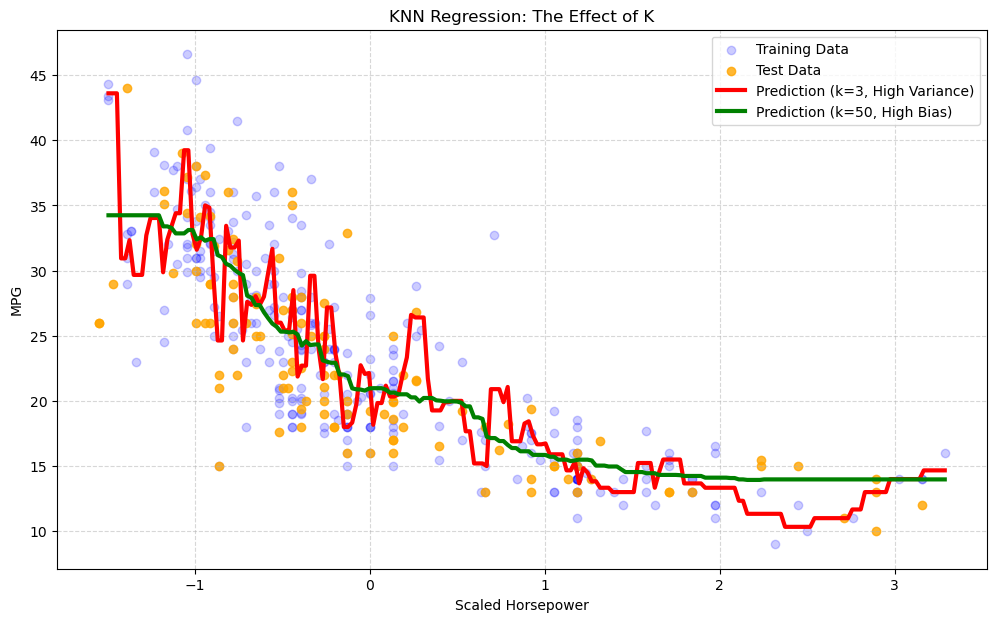

In [11]:
# 1. Create the two models (using 'uniform' weights)
knn_overfit = KNeighborsRegressor(n_neighbors=3, weights='uniform')
knn_underfit = KNeighborsRegressor(n_neighbors=50, weights='uniform')

# 2. Fit both models on the scaled training data
knn_overfit.fit(X_train_scaled, y_train)
knn_underfit.fit(X_train_scaled, y_train)

# 3. Create a smooth line of x-values for plotting
X_plot = np.linspace(X_train_scaled.min(), X_train_scaled.max(), 200).reshape(-1, 1)

# 4. Get the predictions from both models
y_pred_overfit = knn_overfit.predict(X_plot)
y_pred_underfit = knn_underfit.predict(X_plot)

# 5. Plot the results
plt.figure(figsize=(12, 7))
plt.scatter(X_train_scaled, y_train, c='blue', alpha=0.2, label='Training Data')
plt.scatter(X_test_scaled, y_test, c='orange', alpha=0.8, label='Test Data')

plt.plot(X_plot, y_pred_overfit, 'r-', lw=3, label='Prediction (k=3, High Variance)')
plt.plot(X_plot, y_pred_underfit, 'g-', lw=3, label='Prediction (k=50, High Bias)')

plt.title('KNN Regression: The Effect of K')
plt.xlabel('Scaled Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interpretation of the Plot

You can clearly see the bias-variance tradeoff in action:
* The **red line ($k=3$)** is "spiky" and "nervous." It tries to follow the training data (blue dots) too closely. This is **overfitting (High Variance)**.
* The **green line ($k=50$)** is very smooth, acting almost like a simple average. It misses the clear non-linear curve in the data. This is **underfitting (High Bias)**.

Our goal is to find the "sweet spot" $k$ in the middle.

### Finding the Optimal $K$ with Cross-Validation

Just like in our classification example, we can use K-Fold Cross-Validation on the **training set** to find the best $k$.

The only difference is our `scoring` metric. Instead of `accuracy`, we use `neg_mean_squared_error` (scikit-learn uses *negative* MSE because its internal optimizer always tries to *maximize* a score).

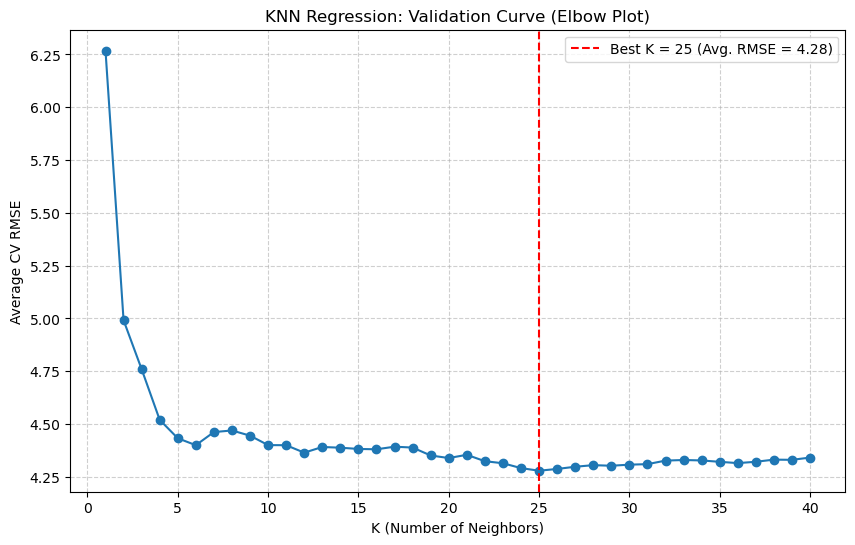

In [12]:
# 1. Define a range of K values to test
k_range = range(1, 41)
cv_scores = [] # This will store the *mean* RMSE for each k

# 2. Loop through each K
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform')
    
    # Perform 5-fold cross-validation on the training data
    # We ask for 'neg_mean_squared_error'
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # We store the *positive* *root* of the MSE
    cv_scores.append(np.sqrt(-scores.mean()))

# 3. Plot the Validation "Elbow" Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, 'o-')
plt.title('KNN Regression: Validation Curve (Elbow Plot)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Average CV RMSE') # Lower is better!
plt.xticks(np.arange(0, 41, 5))

# Find and mark the best K (lowest RMSE)
best_k_index = np.argmin(cv_scores)
best_k = k_range[best_k_index]
best_rmse = cv_scores[best_k_index]
plt.axvline(best_k, linestyle='--', color='red', label=f'Best K = {best_k} (Avg. RMSE = {best_rmse:.2f})')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Final Evaluation

The validation plot shows us that the "sweet spot" (lowest error) is at **$k=25$**.

Now we can train our final, optimized model on the *entire* training set and get our final, unbiased score from the **test set**.

In [13]:
# 1. Train the *final* model with the best K
final_knn_regressor = KNeighborsRegressor(n_neighbors=best_k, weights='uniform')
final_knn_regressor.fit(X_train_scaled, y_train)

# 2. Get final predictions on the (held-out) test set
final_predictions = final_knn_regressor.predict(X_test_scaled)

# 3. Calculate the final, honest RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))

print(f"--- Final Model Evaluation ---")
print(f"The best K found by CV: {best_k}")
print(f"Final Test Set RMSE: {final_rmse:.4f} (mpg)")

--- Final Model Evaluation ---
The best K found by CV: 25
Final Test Set RMSE: 4.2943 (mpg)


## References

-   Evaluation Measures for Classifcation:
    <https://en.wikipedia.org/wiki/Precision_and_recall>
-  Nearest Neighbor: Section 2.5.2 of \[1\]

\[1\] Bishop, Christopher M. *Pattern recognition and machine learning*.
springer, 2006.
<https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf>